In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.injections.dm import DMDecayInjection, DMPWaveAnnihilationInjection
from dm21cm.injections.pbh import PBHHRInjection, PBHAccretionInjection
from dm21cm.utils import abscs
from scripts.step_size import *
from limits import get_limits

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
z_s = np.geomspace(5, 3000-1, 300)

eng_sm = mpl.cm.ScalarMappable(
    norm=mpl.colors.LogNorm(vmin=1e1, vmax=1e13),
    cmap='cool'
)
def eng_cmap(eng):
    return eng_sm.to_rgba(eng)

def mean_eng(spec):
    return np.trapz(spec.eng**2 * spec.dNdE, spec.eng)/np.trapz(spec.eng * spec.dNdE, spec.eng)

# Decay as rough reference

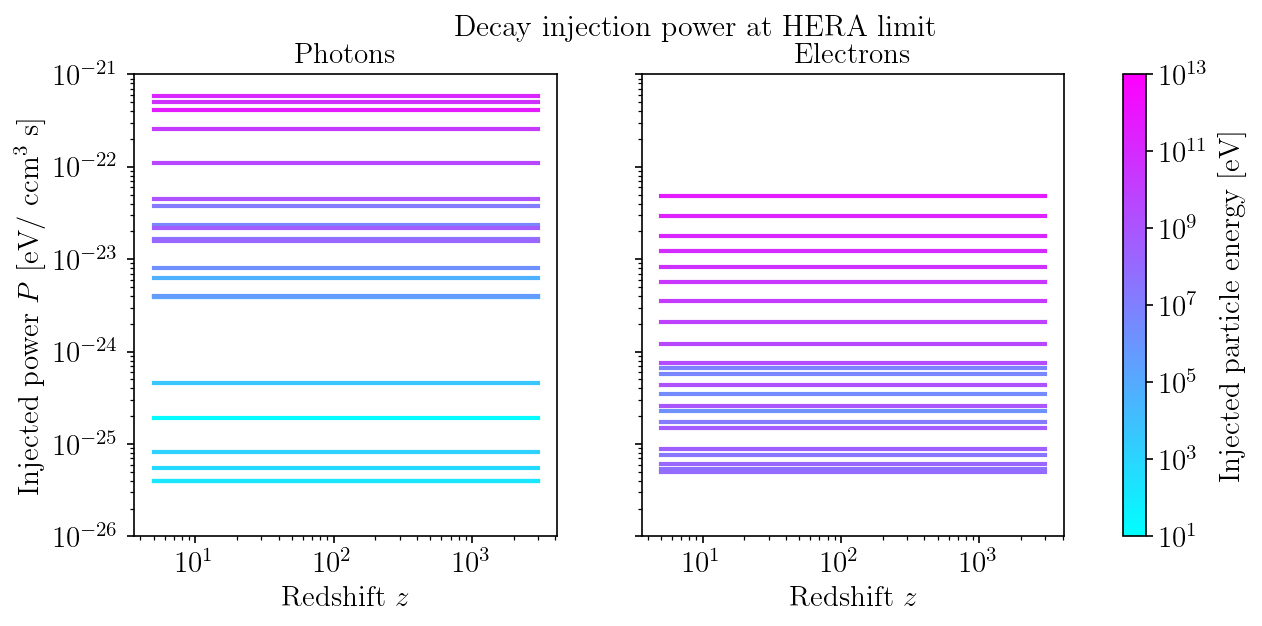

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax = axs[0]
for m in decay_phot_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-phot'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='Photons')
ax.set(ylim=(1e-26, 1e-21))

ax = axs[1]
for m in decay_elec_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='elec_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-elec'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', title='Electrons')

fig.suptitle('Decay injection power at HERA limit')

cbar = fig.colorbar(eng_sm, ax=axs)
cbar.set_label('Injected particle energy [eV]')

# pwave

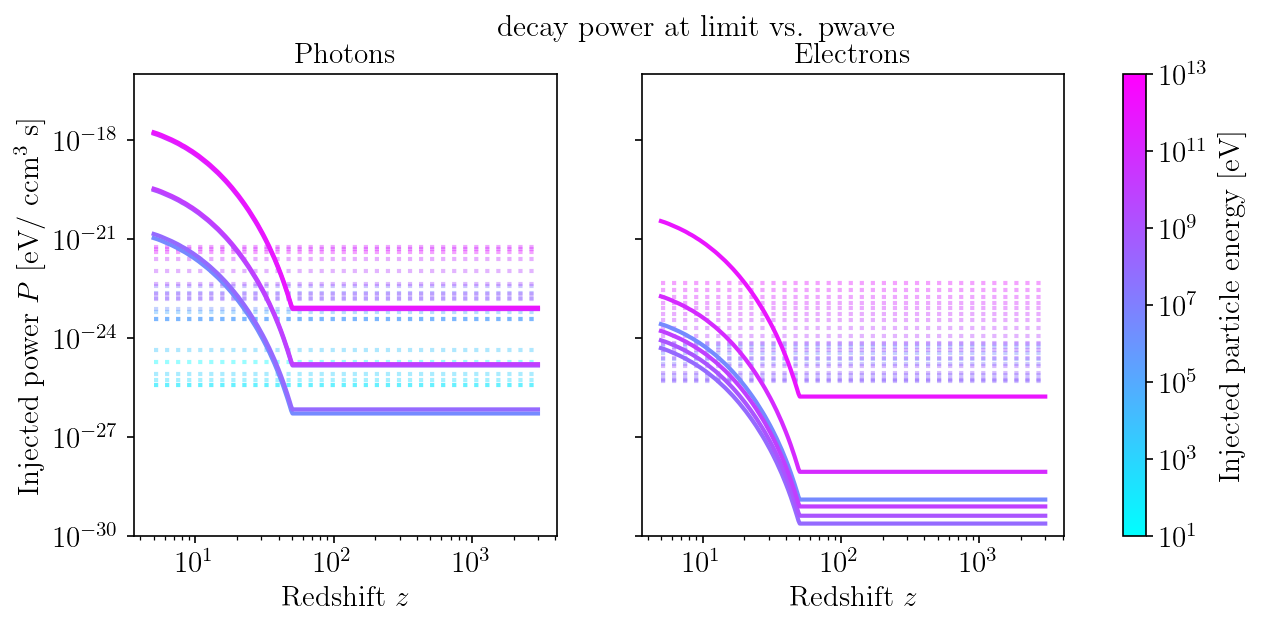

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax = axs[0]
for m in decay_phot_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-phot'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, ':', color=eng_cmap(eng_inj), alpha=0.4)

pwave_phot_m_s = 10**np.array([6.5, 8, 9, 10, 11, 12])
for m in pwave_phot_m_s:
    eng_inj = m
    inj = DMPWaveAnnihilationInjection(primary='phot_delta', m_DM=m, c_sigma=get_limits(m, 'pwave/pwave-phot-iter-3'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))

ax.set(ylim=(1e-30, 1e-16))
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='Photons')


ax = axs[1]
for m in decay_elec_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='elec_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-elec'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, ':', color=eng_cmap(eng_inj), alpha=0.4)

pwave_elec_m_s = 10**np.array([6.5, 8, 9, 10, 11, 12])
for m in pwave_elec_m_s:
    eng_inj = m
    inj = DMPWaveAnnihilationInjection(primary='elec_delta', m_DM=m, c_sigma=get_limits(m, 'pwave/pwave-elec-iter-3'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', title='Electrons')

fig.suptitle('decay power at limit vs. pwave')

cbar = fig.colorbar(eng_sm, ax=axs)
cbar.set_label('Injected particle energy [eV]')

# pbh-accretion

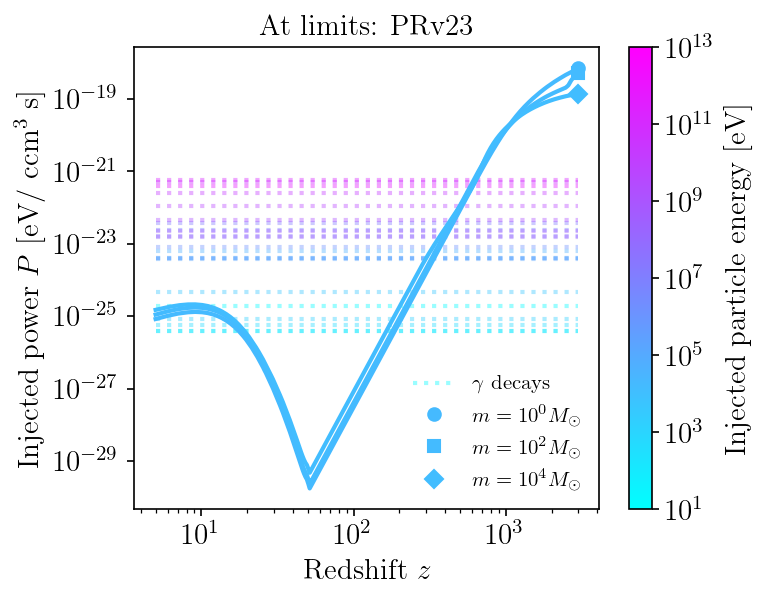

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i_m, m in enumerate(decay_phot_m_s):
    eng_inj = m / 2
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-phot'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, ':', color=eng_cmap(eng_inj), alpha=0.4, label=r'$\gamma$ decays' if i_m == 0 else None)

pbh_acc_m_s = 10**np.array([0, 2, 4])
pbh_marker_s = ['o', 's', 'D']
label_s = [r'$m = 10^{'+f'{expn}'+r'} M_\odot$' for expn in [0, 2, 4]]
for i_m, m in enumerate(pbh_acc_m_s):
    inj = PBHAccretionInjection('PRc23', m_PBH=m, f_PBH=get_limits(m, 'pbh-acc-PRc23-test'))
    eng_inj = mean_eng(inj.phot_spec)
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))
    ax.plot(z_s[-1:], inj_power_s[-1:], marker=pbh_marker_s[i_m], ls='None', color=eng_cmap(eng_inj), label=label_s[i_m])

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='At limits: PRv23')
ax.legend(frameon=False, fontsize=10)

cbar = fig.colorbar(eng_sm, ax=ax)
cbar.set_label('Injected particle energy [eV]')

# pbh-hr

/tmp/ipykernel_3683269/3542079317.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.trapz(spec.eng**2 * spec.dNdE, spec.eng)/np.trapz(spec.eng * spec.dNdE, spec.eng)


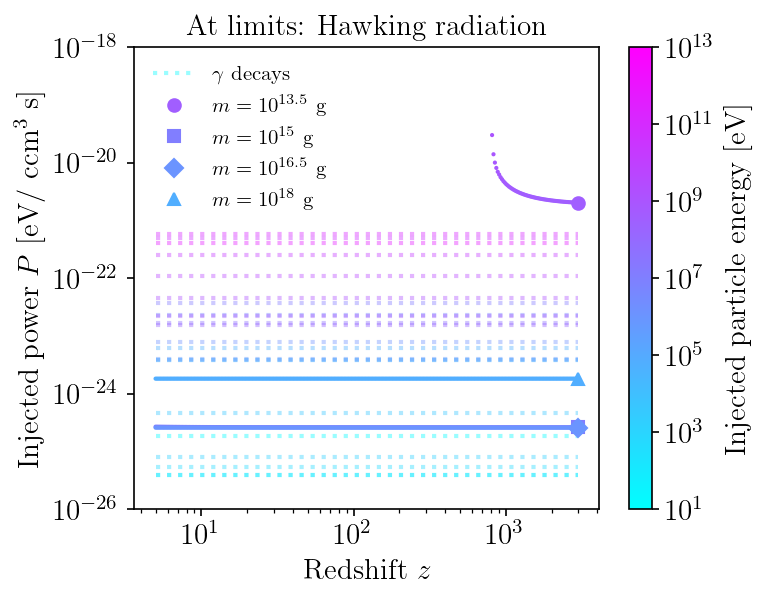

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i_m, m in enumerate(decay_phot_m_s):
    eng_inj = m / 2
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=1/get_limits(m, 'decay-phot'))
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, ':', color=eng_cmap(eng_inj), alpha=0.4, label=r'$\gamma$ decays' if i_m == 0 else None)

pbh_hr_m_s = 10**np.array([13.5, 15, 16.5, 18])
pbh_marker_s = ['o', 's', 'D', '^']
label_s = [r'$m = 10^{'+f'{expn}'+r'}$ g' for expn in [13.5, 15, 16.5, 18]]
for i_m, m in enumerate(pbh_hr_m_s):
    inj = PBHHRInjection(m_PBH=m, f_PBH=get_limits(m, 'pbh-hr'))
    eng_inj_s = [mean_eng(inj.inj_phot_spec(z)) for z in z_s]
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.scatter(z_s, inj_power_s, c=eng_cmap(eng_inj_s), s=1)
    ax.plot(z_s[-1:], inj_power_s[-1:], marker=pbh_marker_s[i_m], ls='None', color=eng_cmap(eng_inj_s[-1]), label=label_s[i_m])
ax.set(ylim=(1e-26, 1e-18))
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='At limits: Hawking radiation')
ax.legend(frameon=False, fontsize=10)

cbar = fig.colorbar(eng_sm, ax=ax)
cbar.set_label('Injected particle energy [eV]')